In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

data = pd.read_excel('rnd_contest_data.xlsx', sheet_name='REF raw data')
data['Date'] = data["Year"].map(str) + ' ' + data["Month"]
data['Date'] = pd.to_datetime(data['Date'])
cluster_data = data.loc[:, ['Brand', 'Model', 'Sales Units', 'PRICE USD/UN.', 'ENERGY LABEL EU', 'NET LTRS.', 'Source', 'NOFROST SYSTEM']]
cluster_data = cluster_data.replace(to_replace=['A+', 'A++', 'A', 'B', 'A+++', 'UNKNOWN', np.nan], value=[4,5,3,2,6,1,0])
cluster_data = cluster_data.replace(to_replace=['unknown'], value=[0])
cluster_data = cluster_data.replace(to_replace=['n.a.'], value=[0])
cluster_data['NET LTRS.'] = cluster_data['NET LTRS.'].astype(int)
cluster_data = cluster_data.replace(to_replace=['NO', 'YES'], value=[1, 2])

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels, subplot, t = None):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)

    subplot.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    subplot.set_xlim(x_min, x_max)
    subplot.set_ylim(y_min, y_max)
    subplot.set_title(t)
    

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    subplot.legend(handles=h)

def plot_labelled_scatter_easy(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()
def subsets(S):
    sets = []
    len_S = len( S )
    for i in range( 1 << len_S ):
        subset = [ S[ bit ] for bit in range( len_S ) if i & ( 1 << bit ) ]
        if len(subset)>2:
            sets.append( subset )
    return sets

### Clusters for traditional sales (All Brands)

C:\Users\denis\Anaconda37\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\denis\Anaconda37\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


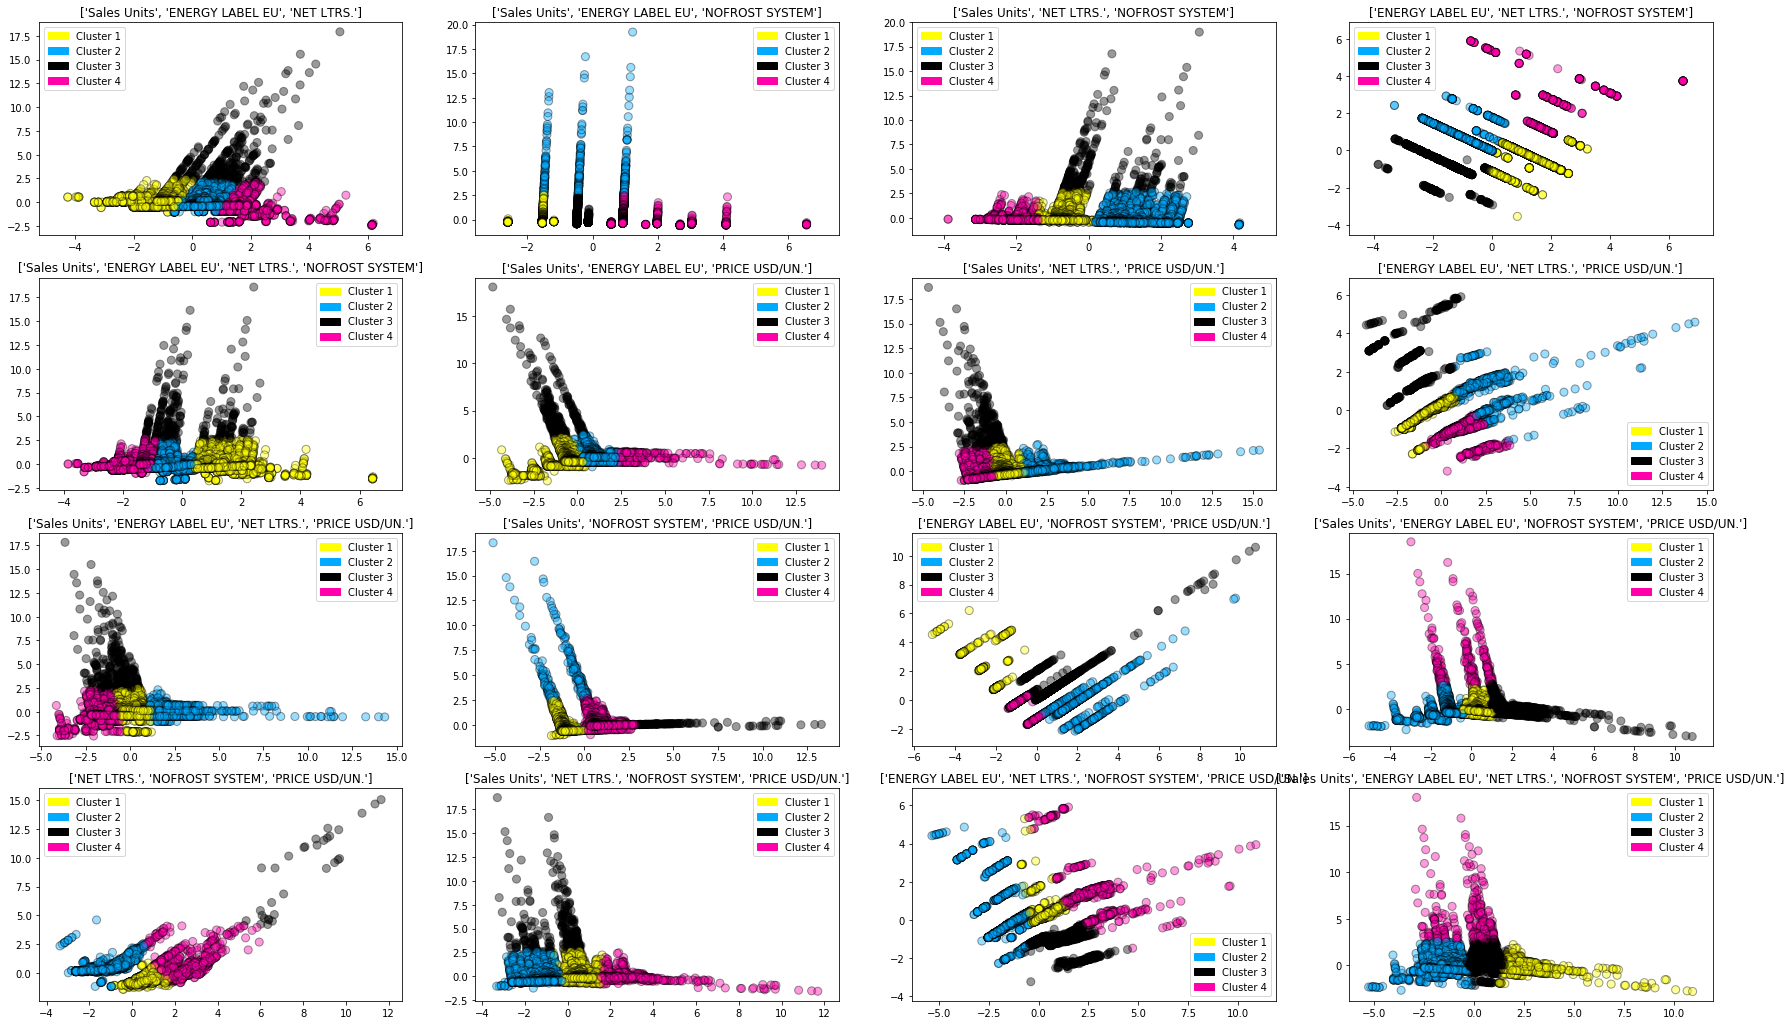

In [34]:
#SAM_data = cluster_data[cluster_data['Brand']=='SAMSUNG']
SAM_data_traditional = cluster_data[cluster_data['Source']=='Traditional Sales']
Featers = ['Sales Units', 'ENERGY LABEL EU', 'NET LTRS.','NOFROST SYSTEM', 'PRICE USD/UN.']
XX=[]
for el in subsets(Featers):
    XX.append(el)
lenn=len(XX)
    
fig, subaxes = plt.subplots(4, 4, figsize=(30, 18))

subaxes = subaxes.flatten()
for el, axis in zip(XX, subaxes):
    X_cancer = SAM_data_traditional.loc[:, el].values
    X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)
    pca = PCA(n_components = 2).fit(X_normalized)
    X_pca = pca.transform(X_normalized)
    kmeans = KMeans(n_clusters = 4)
    kmeans.fit(X_pca)
    plot_labelled_scatter(X_pca, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], subplot=axis, t=el)
    
 
 
X_cancer= SAM_data_traditional.loc[:, ['Sales Units', 'ENERGY LABEL EU', 'NET LTRS.','NOFROST SYSTEM']].values
Sales_Price = SAM_data_traditional.loc[:,['PRICE USD/UN.','Sales Units' ]].values
Sales_LTRS = SAM_data_traditional.loc[:,['NET LTRS.','Sales Units']].values
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

### K-means clustering example | Sales/Price

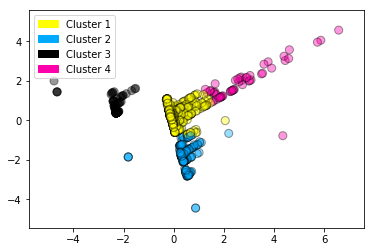

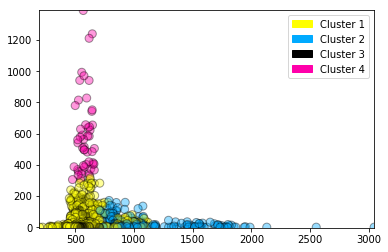

In [39]:
Sales_Price = SAM_data_traditional[SAM_data_traditional['Brand']=='SAMSUNG']
X_cancer= Sales_Price.loc[:, ['Sales Units', 'ENERGY LABEL EU', 'NET LTRS.','NOFROST SYSTEM']].values
Sales_Price = Sales_Price.loc[:,['PRICE USD/UN.', 'Sales Units']].values
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer) 
#X_normalized = StandardScaler().fit(Sales_Price).transform(Sales_Price)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_pca)
plot_labelled_scatter_easy(X_pca, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plot_labelled_scatter_easy(Sales_Price, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### AgglomerativeClustering example | Sales/LTRS

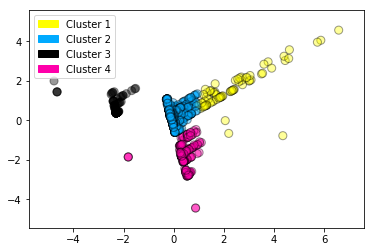

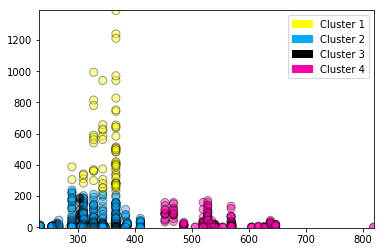

In [40]:
Sales_LTRS = SAM_data_traditional[SAM_data_traditional['Brand']=='SAMSUNG']
Sales_LTRS = Sales_LTRS.loc[:,['NET LTRS.','Sales Units']].values
#X_normalized = StandardScaler().fit(Sales_Price).transform(Sales_Price)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(X_pca)
plot_labelled_scatter_easy(X_pca, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plot_labelled_scatter_easy(Sales_LTRS, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### DBSCAN example

Cluster membership values:
[0 0 0 ... 0 1 1]


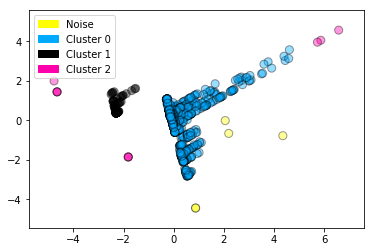

In [41]:

dbscan = DBSCAN(eps = 1, min_samples = 3)

cls = dbscan.fit_predict(X_pca)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter_easy(X_pca, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

### Task 3

In [42]:
Samsung_trad = SAM_data_traditional[SAM_data_traditional['Brand']=='SAMSUNG']
models = Samsung_trad['Model'].unique()
a = np.arange(1, 166)
dictt = dict(zip(models, a))

In [67]:
Samsung_trad = Samsung_trad.replace(to_replace=dictt.keys(), value=dictt.values())

In [76]:
Sales_Mod = Samsung_trad.loc[:, ['Model', 'Sales Units']].values

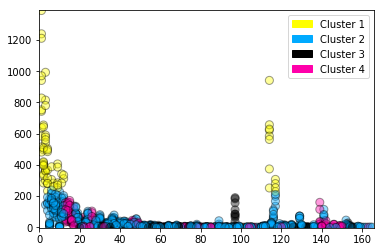

In [77]:
plot_labelled_scatter_easy(Sales_Mod, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [104]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k
        
Clust_1 = []
Clust_2 = []
Clust_3 = []
Clust_4 = []

for i in range(len(cls_assignment)):
    if cls_assignment[i]==0:
        Clust_1.append(get_key(dictt, i))
Clust_1 = [x for x in Clust_1 if x is not None]

for i in range(len(cls_assignment)):
    if cls_assignment[i]==1:
        Clust_2.append(get_key(dictt, i))
Clust_2 = [x for x in Clust_2 if x is not None]

for i in range(len(cls_assignment)):
    if cls_assignment[i]==2:
        Clust_3.append(get_key(dictt, i))
Clust_3 = [x for x in Clust_3 if x is not None]

for i in range(len(cls_assignment)):
    if cls_assignment[i]==3:
        Clust_4.append(get_key(dictt, i))
Clust_4 = [x for x in Clust_4 if x is not None]



In [105]:
print("Competitors_1", Clust_1)

Competitors_1 ['RB37J5000SA/UA', 'RB37J5000EF/UA', 'RB33J3000SA', 'RSA1SHWP', 'RB31FSRMDSS', 'RT25HAR4DSA', 'RB34N5291EF/WT']


In [106]:
print("Competitors_2", Clust_2)

Competitors_2 ['RB37J5220SA', 'RB30J3000SA', 'RB29FSRNDSA/UA', 'RB37J5340SL', 'RB33J3000EF/UA', 'RB 37 J 5220 EF', 'RB29FSRNDSA', 'RB31FSRNDSA/UA', 'RS57K4000SA/EF', 'RB37J5000WW/UA', 'RB33J3305SS/UA', 'RSA 1 RHMG1', 'RB33J3000WW/UA', 'RT53K6340UT/WT', 'RB31FSRNDWW', 'RB41J7851SR', 'RB33J3200EF', 'RSA1SHVB1/BWT', 'RB37J5100WW/UA', 'RB37J5005EF/UA', 'RB30J3000WW/EF', 'RB29FSRNDWW', 'RB29FSJNDEF/UA', 'RB33J3220SS', 'RB37J5000EF', 'RB37J5005WW/UA', 'RB 37 J 5000 SS UA', 'RB33J3200SA', 'RB29FEJNDWW', 'RS62K6267FG/UA', 'RB33J3000WW/EF', 'RF50K5960DP/UA', 'RT22HAR4DWW', 'RT25HAR4DWW', 'RT22HAR4DSA', 'RB37J5225EF/UA', 'RB37J5015SS', 'RB37J5000SA/EF', 'RB37J5225SA/UA', 'RB37J5005SS/UA', 'RL55TTE2A', 'RB31HSR2DSA', 'RB31FERNDWW', 'RB31FSJNDEF', 'RB31FERNDEF/UA', 'RB37J5315EF', 'RS55K50A02A/UA', 'RB37J5345SL', 'RB37J5315SS', 'RB31FEJMDEF/UA', 'RF905QBLAXW', 'RL-48 RLBSW', 'RB29FEJNDEF', 'RT 37 MBSW', 'BRB260034WW/EF', 'RB30J3000WW / UA', 'RB31FSJNDSA/UA', 'RB41J7851XB/UA', 'RB41J7851WW', 'RB38J7

In [107]:
print("Competitors_3", Clust_3)

Competitors_3 ['RB33J3320EF', 'RB37K63402C/UA', 'RB37K63401L/UA', 'RB 37 J 5220 WW', 'RB30J3200SS/WT', 'RB31FSJNDSA', 'RS552NRUA1J', 'RB33J3200WW', 'RB31FSRNDWW/WT', 'RB37J5010SA', 'RB37K63402A/UA', 'RB34N5440B1/UA', 'RB37J5005B1/EF', 'RS7527THCSR/EF', 'RS68N8220SL/UA', 'RL55TTE2C']


In [108]:
print("Competitors_4", Clust_4)

Competitors_4 ['RB31FSRNDEF', 'RT46K6340S8/UA', 'RT46K6340EF/UA', 'RT53K6330SL/UA', 'RT53K6330EF/UA', 'RB37J5100SA/UA', 'RB31FSRNDSA', 'RS57K4000WW/UA', 'RB37J5005SA', 'RB31FERNDEF', 'RB37J5000WW/EF', 'RB38J7810SR', 'RB28FSJNDEF', 'RSH5ZLMR1/BWT', 'RB31HSR2DWW', 'RH60H90203L/SC', 'RH60H90207F', 'RB31FSJNDWW', 'RSA1SHMG', 'RS7527THCSL', 'RL50RRCSW', 'RB29FSRNDWW/UA', 'RB34N5440SA/UA', 'RB34N5291SL/UA', 'RB34N5440EF/UA', 'RB37J5225SS', 'RB30J3000SA/UA', 'RB31HER2CSA', 'RB34K6000SS', 'RB37K6221S4/UA', 'RSH5SLBG']
